# Analisi SQUAT ex post 'previsione' vs. 'reale'

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
# Scelta automatica del Path locale tra "paoloartasensi" o "lorenzobassetti"
path = '/Users/paoloartasensi/Python_Scripts/'
isdir = os.path.isdir(path)
if isdir == True:
    path = '/Users/paoloartasensi/Python_Scripts/'
else:
    path = '/Users/lorenzobassetti/Dropbox/Quant/Python_DEV/'

In [3]:
df_raw = pd.read_csv(path+'wow/artbax_csv/squat_20221221_1124PM_prob.csv')
df_raw.set_index('Time', inplace=True)
# df

In [4]:
shift = 5
soglia_prob = 0.5
rolling_prob = 10

In [5]:
df=df_raw.copy()
# df.rolling(5).mean()
df['prob'] = df['prob'].rolling(rolling_prob).mean()

In [6]:
df['prob'].loc[df['prob'] > soglia_prob] = 1
df['prob'].loc[df['prob'] <= soglia_prob] = 0

/var/folders/3c/slz2lm7j261c98fw2gd6wrz00000gp/T/ipykernel_50008/508540148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prob'].loc[df['prob'] > soglia_prob] = 1
/var/folders/3c/slz2lm7j261c98fw2gd6wrz00000gp/T/ipykernel_50008/508540148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prob'].loc[df['prob'] <= soglia_prob] = 0


In [7]:
# applico uno shift per ogni posizione i con ['DOWN']==1, 
# assegno alle righe prima e dopo ['DOWN']=1
# numero di righe determinato da [shift]

df_temp = df.loc[df['DOWN'] ==1]
pos = np.array(df_temp.index)

for i in pos:
    for k in range(-shift+1, shift, 1):
        df.at[i+k, 'DOWN'] =1


df_temp2 = df.loc[df['prob'] ==1]
pos2 = np.array(df_temp2.index)

for i in pos2:
    for k in range(-shift+1, shift, 1):
        df.at[i+k, 'prob'] =1

df.dropna(inplace=True)

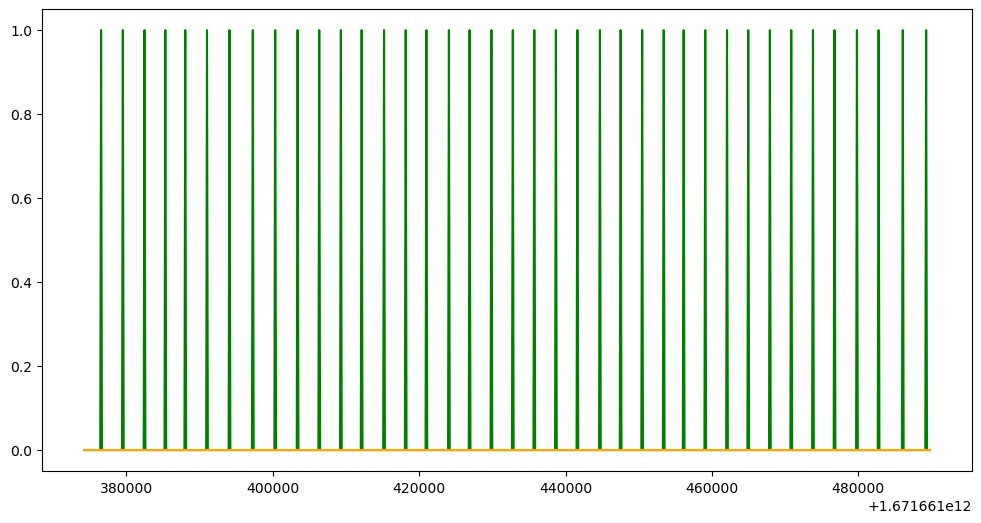

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df['DOWN'], color='green')
plt.plot(df['prob'], color='orange')
plt.show()